**Decision Tree Classifier**

Library imports

In [7]:
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

sys.path.insert(0, str(Path.cwd().parent))

Data Imports

In [8]:
from utils.utils import save_experiment, train_and_evaluate_decision_tree, grid_search_joblib
from configs.config import DATASET_PATH, ITW_DATASET_PATH, FEATURES_DIR

Training / Testing Validation features:
Using mean aggregated, N_MFCC = 20, N_FTT = 128, HOP_LENGTH = 256, N_MELS = 128

In [9]:
train_path = os.path.join(FEATURES_DIR, "training_features_mean_20_128_256_128.parquet")
val_path = os.path.join(FEATURES_DIR, "validation_features_mean_20_128_256_128.parquet")
test_path = os.path.join(FEATURES_DIR, "testing_features_mean_20_128_256_128.parquet")

Training with default hyperparameters

In [10]:
clf, metrics, dt_params, feature_names, metadata_extra = train_and_evaluate_decision_tree(
    train_path=train_path,
    val_path=val_path,
    test_path=None,
)
print(metadata_extra)
print(metrics)

{'train_samples': 53864, 'val_samples': 10797}
{'accuracy': 0.9623969621191072, 'precision': 0.9624331701550768, 'recall': 0.9623973735478988, 'f1': 0.9623962495603613, 'roc_auc': 0.9800186674339881}


In [12]:
clf, metrics, dt_params, feature_names, metadata_extra = train_and_evaluate_decision_tree(
    train_path=train_path,
    val_path=test_path,
    test_path=None,
)
print(metadata_extra)
print(metrics)

{'train_samples': 53864, 'val_samples': 4634}
{'accuracy': 0.8970651704790678, 'precision': 0.8972262590694, 'recall': 0.8973915701271786, 'f1': 0.8970611390103391, 'roc_auc': 0.9139537765949516}


Training with default hyperparameters using Entropy

In [ ]:
clf, metrics, dt_params, feature_names, metadata_extra = train_and_evaluate_decision_tree(
    train_path=train_path,
    val_path=val_path,
    test_path=None,
    criterion="entropy"
)
print(metadata_extra)
print(metrics)

Training with weighted fake class

In [ ]:

params = {
            "max_depth": 11,
            "min_samples_split": 5,
            "min_samples_leaf": 2,
            "max_features": None,
            "random_state": 42,
            "class_weight": {0: 1, 1: 5}
        }

clf, metrics, dt_params, feature_names, metadata_extra = train_and_evaluate_decision_tree(
    train_path=train_path,
    val_path=None,
    test_path=test_path,
    criterion="gini",
    dt_params=params
)
print(metadata_extra)
print(metrics)

**Validate using the ITW Dataset**

In [4]:

itw_val_path = os.path.join(ITW_DATASET_PATH, "normalized_features", "itw_features_20_128_256_128_trimmed_loudness_normalized.parquet")

In [ ]:
clf, metrics, dt_params, feature_names, metadata_extra = train_and_evaluate_decision_tree(
    train_path=train_path,
    val_path=itw_val_path,
    test_path=None,
    criterion="gini"
)
print(metadata_extra)
print(metrics)

Validation using weighted fake class

In [9]:

params = {
            "max_depth": 13,
            "min_samples_split": 5,
            "min_samples_leaf": 2,
            "max_features": None,
            "random_state": 42,
            "class_weight": {0: 1, 1: 5}
        }

clf, metrics, dt_params, feature_names, metadata_extra = train_and_evaluate_decision_tree(
    train_path=train_path,
    val_path=itw_val_path,
    test_path=None,
    criterion="gini",
    dt_params=params
)
print(metadata_extra)
print(metrics)

{'train_samples': 53864, 'val_samples': 31526}
{'accuracy': 0.6197107149654254, 'precision': 0.5766391369902627, 'recall': 0.5625959255702471, 'f1': 0.5599839163278001, 'roc_auc': 0.5650645091220868}


**Hyperparameter Grid Search**

In [ ]:
model = DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [x for x in range(5, 20)],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [{0: 1, 1: 5}, None],
    "criterion": ["gini", "entropy"],
    "ccp_alpha": [0.0, 1e-4, 1e-3, 1e-2],
}


(
    final_model,
    test_metrics,
    val_metrics,
    best_params,
    val_results,
    metadata,
    feature_names
) = grid_search_joblib(
    model=model,
    param_grid=params,
    train_path=train_path,
    val_path=test_path,
    test_path=itw_val_path,
    scoring="f1_macro",
    verbose=1,
    n_jobs=-1
)


Number of fits: 540 with n_jobs=-1 parallel jobs


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

[1] {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} | val_acc=0.9109 | val_f1=0.9100
[2] {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5} | val_acc=0.9109 | val_f1=0.9100
[3] {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10} | val_acc=0.9109 | val_f1=0.9100
[4] {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2} | val_acc=0.9109 | val_f1=0.9100
[5] {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5} | val_acc=0.9109 | val_f1=0.9100
[6] {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10} | val_acc=0.9109 | val_f1=0.9100
[7] {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 5, 'min_samples_l

In [6]:

print(f"Best parameters:\n{best_params}")
print(f"Validation metrics:\n{val_metrics}")
print(f"Test metrics:\n{test_metrics}")

save_experiment(
    model=final_model,
    metrics=test_metrics,
    experiment_dir=os.path.join(sys.path[0], "notebooks", "experiments", f"DTree_grid"),
    model_params=best_params,
    feature_names=feature_names,
    val_results=val_results
)

Best parameters:
{'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Validation metrics:
{'accuracy': 0.9544669831678895, 'precision': 0.9565446842341621, 'recall': 0.9537764085819505, 'f1': 0.9543434951875653, 'roc_auc': 0.9587549947071015}
Test metrics:
{'accuracy': 0.5904650130051387, 'precision': 0.5495073607252696, 'recall': 0.5451253985978278, 'f1': 0.5446194544574838, 'roc_auc': 0.5215845492595395}
Experiment saved to: c:\Users\geon9\MSc\audio-deepfake-detection\notebooks\experiments\DTree_grid\exp_20260201_020222


'c:\\Users\\geon9\\MSc\\audio-deepfake-detection\\notebooks\\experiments\\DTree_grid\\exp_20260201_020222'

**Accuracy vs Tree Depth Tradeoff Analysis**

Experiment missing
Experiment Not Found!


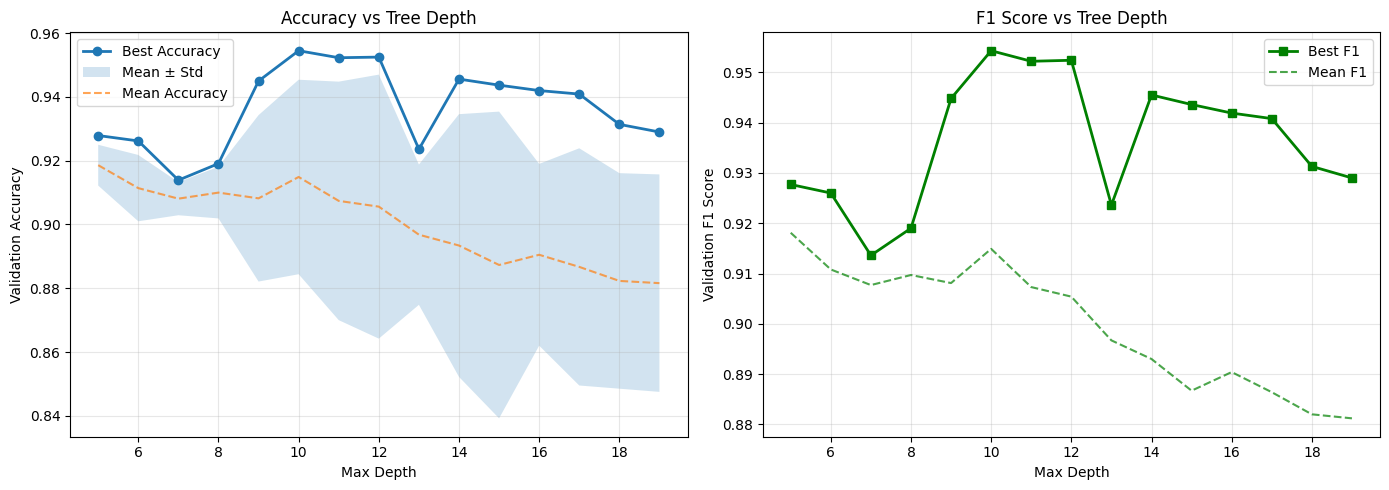


Depth vs Performance Summary:
 max_depth  acc_max  acc_mean  acc_std  f1_max  f1_mean
         5   0.9279    0.9186   0.0064  0.9277   0.9181
         6   0.9262    0.9114   0.0104  0.9260   0.9108
         7   0.9139    0.9081   0.0052  0.9136   0.9077
         8   0.9191    0.9100   0.0081  0.9190   0.9097
         9   0.9450    0.9082   0.0261  0.9448   0.9081
        10   0.9545    0.9149   0.0305  0.9543   0.9149
        11   0.9523    0.9074   0.0374  0.9522   0.9073
        12   0.9525    0.9056   0.0414  0.9524   0.9054
        13   0.9236    0.8968   0.0220  0.9236   0.8967
        14   0.9456    0.8934   0.0412  0.9455   0.8930
        15   0.9437    0.8873   0.0481  0.9436   0.8867
        16   0.9420    0.8905   0.0285  0.9419   0.8904
        17   0.9409    0.8867   0.0372  0.9408   0.8864
        18   0.9314    0.8823   0.0338  0.9313   0.8820
        19   0.9290    0.8816   0.0341  0.9290   0.8812


In [8]:
# Plot accuracy vs tree depth tradeoff
import json
import pandas as pd

experiment = "exp_20260201_020222"

val_results_path = Path.cwd() / "notebooks" / "experiments" / "DTree_grid" / experiment / "val_results.json"

try:    
    val_results_path.exists()
    print("Experiment missing")
    with open(val_results_path) as f:
        val_results = json.load(f)
except FileNotFoundError:
    print("Experiment Not Found!")

df_results = pd.DataFrame([
    {
        'max_depth': r['params']['max_depth'],
        'criterion': r['params']['criterion'],
        'class_weight': 'weighted' if r['params'].get('class_weight') else 'none',
        'accuracy': r['val_accuracy'],
        'f1': r['val_f1_macro'],
    }
    for r in val_results
])

# Aggregate: best accuracy per depth
depth_best = df_results.groupby('max_depth').agg({
    'accuracy': ['max', 'mean', 'std'],
    'f1': ['max', 'mean']
}).round(4)
depth_best.columns = ['acc_max', 'acc_mean', 'acc_std', 'f1_max', 'f1_mean']
depth_best = depth_best.reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Accuracy vs Depth
ax1 = axes[0]
ax1.plot(depth_best['max_depth'], depth_best['acc_max'], 'o-', label='Best Accuracy', linewidth=2)
ax1.fill_between(
    depth_best['max_depth'],
    depth_best['acc_mean'] - depth_best['acc_std'],
    depth_best['acc_mean'] + depth_best['acc_std'],
    alpha=0.2, label='Mean ± Std'
)
ax1.plot(depth_best['max_depth'], depth_best['acc_mean'], '--', label='Mean Accuracy', alpha=0.7)
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Validation Accuracy')
ax1.set_title('Accuracy vs Tree Depth')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right: F1 vs Depth
ax2 = axes[1]
ax2.plot(depth_best['max_depth'], depth_best['f1_max'], 's-', label='Best F1', linewidth=2, color='green')
ax2.plot(depth_best['max_depth'], depth_best['f1_mean'], '--', label='Mean F1', alpha=0.7, color='green')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('Validation F1 Score')
ax2.set_title('F1 Score vs Tree Depth')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\nDepth vs Performance Summary:")
print(depth_best.to_string(index=False))

**Cost complexity pruning path**

In [ ]:
import numpy as np
from utils.utils import load_and_prepare_data
from sklearn.metrics import accuracy_score

X_train, y_train, X_val, y_val, X_test, y_test, _ = load_and_prepare_data(
    train_path, val_path, test_path
)

clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
path = clf_full.cost_complexity_pruning_path(X_train, y_train)

n_alphas = len(path.ccp_alphas)
indices = (
    np.linspace(0, n_alphas - 1, min(50, n_alphas), dtype=int)
    if n_alphas > 50
    else np.arange(n_alphas)
)
alphas_sub = path.ccp_alphas[indices]
impurities_sub = path.impurities[indices]

val_accs = []
for alpha in alphas_sub:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
    val_accs.append(accuracy_score(y_val, clf_pruned.predict(X_val)))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1 = axes[0]
ax1.plot(path.ccp_alphas, path.impurities, "o-", markersize=2)
ax1.set_xlabel("ccp_alpha")
ax1.set_ylabel("Total impurity of leaves")
ax1.set_title("Cost complexity pruning path (impurity)")
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
ax2.plot(alphas_sub, val_accs, "o-")
ax2.set_xlabel("ccp_alpha")
ax2.set_ylabel("Validation accuracy")
ax2.set_title("Validation accuracy vs ccp_alpha")
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()